# One Hot Encoding & Dummy variables

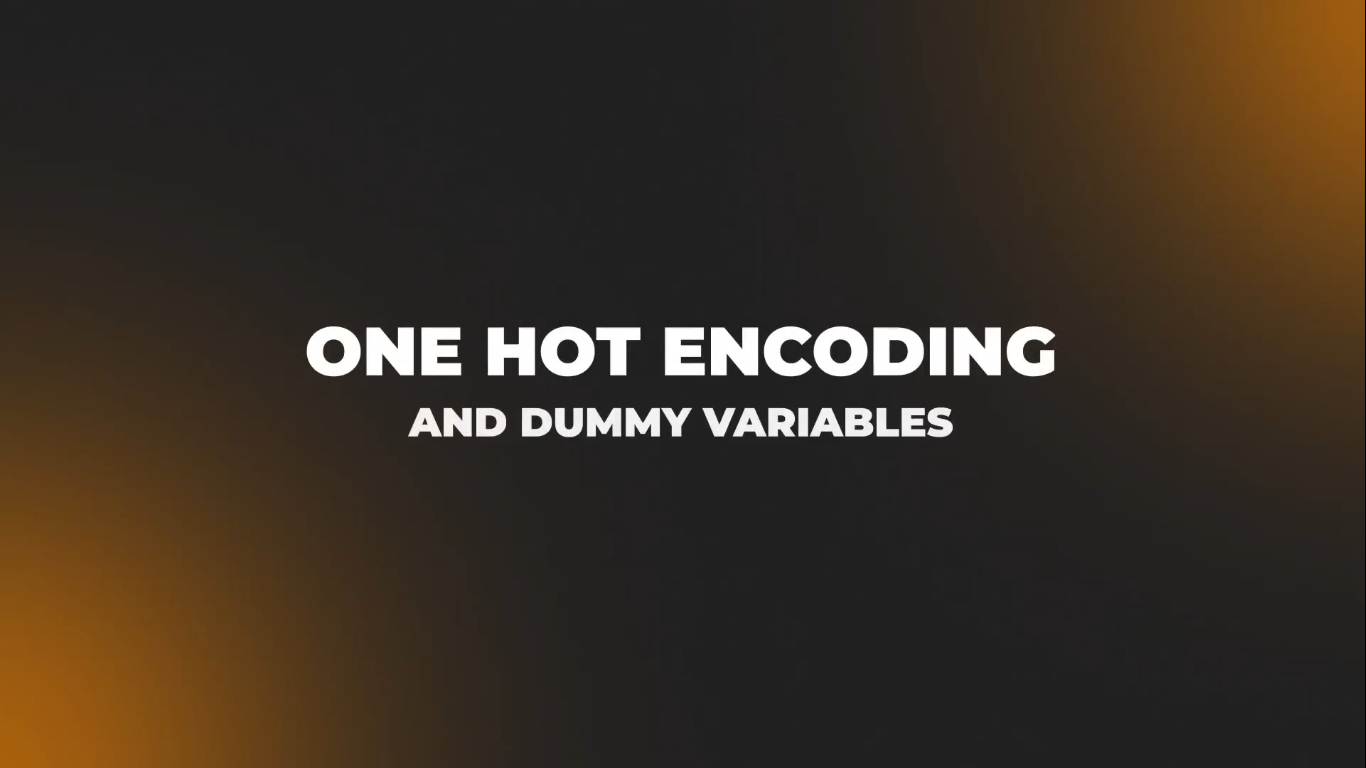

In [148]:
from IPython.display import Image, display
display(Image(filename=r"H:\Programming\Files\Machine Learning\photos\C_06.png"))

In [304]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [310]:
df = pd.read_csv(r"H:\Programming\Files\Machine Learning\Files\Loan Dataset.csv")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [312]:
def check(self):
    print("\nCheck Shape:")
    print(self.shape)
    print("\nCheck Info:")
    print(self.info())
    print("\nCheck NaN Values:")
    print(self.isnull().sum())
    

check(df)


Check Shape:
(614, 13)

Check Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Check NaN Values:
Loan_ID               0
Gender               13
Mar

In [314]:
df_n = df[['Gender','Married']]
df_n.head(3)

,Gender,Married
0,Male,No
1,Male,Yes
2,Male,Yes


In [316]:
# Finding mode in the Gender column
df_n['Gender'].mode()[0]

'Male'

In [318]:
# Fill NaN Value By fillna using mode 
df_n['Gender'].fillna(df_n["Gender"].mode()[0], inplace=True)
df_n['Married'].fillna(df_n['Married'].mode()[0], inplace=True)

# df["Gender","Married"].isnull().sum()

In [320]:
df_n.isnull().sum()

Gender     0
Married    0
dtype: int64

# Machine Learning 

## Encoding by get_dummies 

In [324]:
# Changing DataType in boolilan
pd.get_dummies(df_n)


,Gender_Female,Gender_Male,Married_No,Married_Yes
0,False,True,True,False
1,False,True,False,True
2,False,True,False,True
3,False,True,False,True
4,False,True,True,False
...,...,...,...,...
609,True,False,True,False
610,False,True,False,True
611,False,True,False,True
612,False,True,False,True


In [326]:
pd.get_dummies(df_n).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    bool 
 1   Gender_Male    614 non-null    bool 
 2   Married_No     614 non-null    bool 
 3   Married_Yes    614 non-null    bool 
dtypes: bool(4)
memory usage: 2.5 KB


## One Hot Encoder

In [329]:
from sklearn.preprocessing import OneHotEncoder

In [331]:
ohe = OneHotEncoder(drop="first")
arr = ohe.fit_transform(df_n).toarray()
arr

array([[1., 0.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [0., 0.]])

In [333]:
# Initialize the OneHotEncoder and drop the first category to avoid multicollinearity
ohe = OneHotEncoder(drop="first")

# Fit and transform the data, then convert the result to an array
arr = ohe.fit_transform(df_n).toarray()

# Create a DataFrame from the array with the specified column names
df = pd.DataFrame(arr, columns=["Gender_Male","Married_Yes"])

# Display the first 3 rows of the DataFrame
df.head(3)

,Gender_Male,Married_Yes
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0


# All in one 

In [308]:
df_n = df[['Gender','Married']]

# Fill NaN Value By fillna using mode 
df_n['Gender'].fillna(df_n["Gender"].mode()[0], inplace=True)
df_n['Married'].fillna(df_n['Married'].mode()[0], inplace=True)


from sklearn.preprocessing import OneHotEncoder
pd.get_dummies(df_n)

# Initialize the OneHotEncoder and drop the first category to avoid multicollinearity
ohe = OneHotEncoder(drop="first")
# Fit and transform the data, then convert the result to an array
arr = ohe.fit_transform(df_n).toarray()
# Create a DataFrame from the array with the specified column names
df = pd.DataFrame(arr, columns=["Gender_Male","Married_Yes"])
# Display the first 3 rows of the DataFrame
df.head(3)

,Gender_Male,Married_Yes
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0
